# Fussing about

In [9]:
# imports
import os
import xarray

import numpy as np
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns

import pandas

from siosandbox.cugn import utils as cugn_utils

# Load up 

In [4]:
datafile = os.path.join(os.getenv('CUGN'), 'CUGN_line_90.nc')
ds = xarray.load_dataset(datafile)

In [5]:
ds

<xarray.Dataset>
Dimensions:               (profile: 54842, trajectory: 70, depth: 50)
Coordinates:
  * profile               (profile) int32 0 1 2 3 4 ... 54838 54839 54840 54841
  * depth                 (depth) int32 10 20 30 40 50 ... 460 470 480 490 500
    lat                   (profile) float64 33.44 33.44 33.44 ... 32.89 32.88
    lon                   (profile) float64 -117.7 -117.7 ... -117.3 -117.3
    lat_uv                (profile) float64 33.44 33.44 33.44 ... 32.89 32.88
    lon_uv                (profile) float64 -117.7 -117.7 ... -117.3 -117.3
    time                  (profile) datetime64[ns] 2006-10-19T17:51:00 ... 20...
    time_uv               (profile) datetime64[ns] 2006-10-19T17:41:00 ... 20...
Dimensions without coordinates: trajectory
Data variables: (12/13)
    mission_name          (trajectory) |S8 b'06A01301' ... b'22C01301'
    u_depth_mean          (profile) float64 0.03852 -0.01392 ... 0.01629 0.04539
    v_depth_mean          (profile) float64 -0.06798 0.02441 ... 0.03231 0.02128
    temperature           (depth, profile) float64 17.73 17.93 17.85 ... nan nan
    salinity              (depth, profile) float64 33.34 33.34 33.35 ... nan nan
    chlorophyll_a         (depth, profile) float64 0.1973 0.149 ... nan nan
    ...                    ...
    v                     (depth, profile) float64 -0.2067 nan nan ... nan nan
    acoustic_backscatter  (depth, profile) float64 71.58 nan nan ... nan nan nan
    doxy                  (depth, profile) float64 nan nan nan ... nan nan nan
    mission               (profile) int32 0 0 0 0 0 0 0 ... 69 69 69 69 69 69 69
    mission_profile       (profile) int32 1 2 3 4 5 6 ... 975 976 977 978 979
    trajectory_index      (profile) int32 0 0 0 0 0 0 0 ... 69 69 69 69 69 69 69
Attributes: (12/50)
    id:                              CUGN_line_90
    date_created:                    2023-08-22T08:43:54Z
    time_coverage_start:             2006-10-19T17:41:00Z
    time_coverage_end:               2023-03-20T15:42:26Z
    geospatial_bounds_crs:           EPSG:4326
    geospatial_bounds:               POLYGON ((-121.0906975 21.58784, -121.09...
    ...                              ...
    platform_institution:            Scripps Institution of Oceanography
    sea_name:                        Coastal Waters of California
    summary:                         The overarching goal of the California U...
    references:                      Rudnick, D. L. (2016). Ocean research en...
    title:                           California Underwater Glider Network - L...
    site:                            CUGN Line 90

In [7]:
ds.doxy

<xarray.DataArray 'doxy' (depth: 50, profile: 54842)>
array([[         nan,          nan,          nan, ..., 285.60916059,
        279.16544893, 275.34745611],
       [         nan,          nan,          nan, ..., 240.90238893,
        235.91273283, 232.39629917],
       [         nan,          nan,          nan, ..., 191.27789348,
        208.70717193, 188.49147997],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
  * profile  (profile) int32 0 1 2 3 4 5 ... 54836 54837 54838 54839 54840 54841
  * depth    (depth) int32 10 20 30 40 50 60 70 ... 440 450 460 470 480 490 500
    lat      (profile) float64 33.44 33.44 33.44 33.44 ... 32.89 32.89 32.88
    lon      (profile) float64 -117.7 -117.7 -117.7 ... -117.3 -117.3 -117.3
    lat_uv   (profile) float64 33.44 33.44 33.44 33.44 ... 32.89 32.89 32.88
    lon_uv   (profile) float64 -117.7 -117.7 -117.7 ... -117.3 -117.3 -117.3
    time     (profile) datetime64[ns] 2006-10-19T17:51:00 ... 2023-03-20T15:4...
    time_uv  (profile) datetime64[ns] 2006-10-19T17:41:00 ... 2023-03-20T15:3...
Attributes:
    long_name:              Dissolved oxygen
    standard_name:          moles_of_oxygen_per_unit_mass_in_sea_water
    units:                  micromol kg-1
    coverage_content_type:  physicalMeasurement

# Explore

In [21]:
ds.doxy

<xarray.DataArray 'doxy' (depth: 50, profile: 54842)>
array([[         nan,          nan,          nan, ..., 285.60916059,
        279.16544893, 275.34745611],
       [         nan,          nan,          nan, ..., 240.90238893,
        235.91273283, 232.39629917],
       [         nan,          nan,          nan, ..., 191.27789348,
        208.70717193, 188.49147997],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
  * profile  (profile) int32 0 1 2 3 4 5 ... 54836 54837 54838 54839 54840 54841
  * depth    (depth) int32 10 20 30 40 50 60 70 ... 440 450 460 470 480 490 500
    lat      (profile) float64 33.44 33.44 33.44 33.44 ... 32.89 32.89 32.88
    lon      (profile) float64 -117.7 -117.7 -117.7 ... -117.3 -117.3 -117.3
    lat_uv   (profile) float64 33.44 33.44 33.44 33.44 ... 32.89 32.89 32.88
    lon_uv   (profile) float64 -117.7 -117.7 -117.7 ... -117.3 -117.3 -117.3
    time     (profile) datetime64[ns] 2006-10-19T17:51:00 ... 2023-03-20T15:4...
    time_uv  (profile) datetime64[ns] 2006-10-19T17:41:00 ... 2023-03-20T15:3...
Attributes:
    long_name:              Dissolved oxygen
    standard_name:          moles_of_oxygen_per_unit_mass_in_sea_water
    units:                  micromol kg-1
    coverage_content_type:  physicalMeasurement

## Extract

In [48]:
t_surface = ds.temperature.data[0,:]
s_surface = ds.salinity.data[0,:]
o_surface = ds.doxy.data[0,:]

In [52]:
t_surface.shape

(54842,)

In [24]:
gd = np.isfinite(t_surface) & np.isfinite(s_surface) & np.isfinite(o_surface)
np.sum(gd.data)

20126

In [55]:
df_s = pandas.DataFrame()
df_s['Temp'] = t_surface[gd]
df_s['S'] = s_surface[gd]
df_s['O'] = o_surface[gd]

## Examine

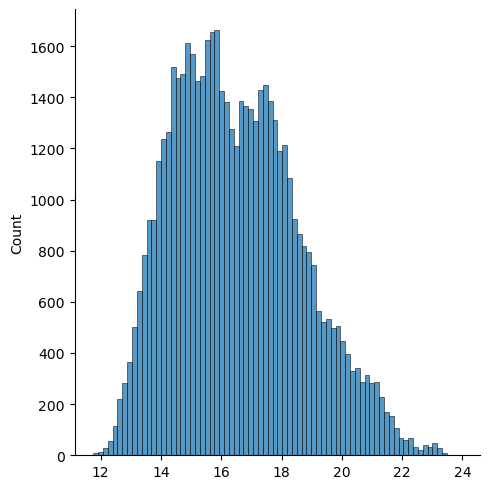

In [26]:
sns.displot(t_surface)

## 2D

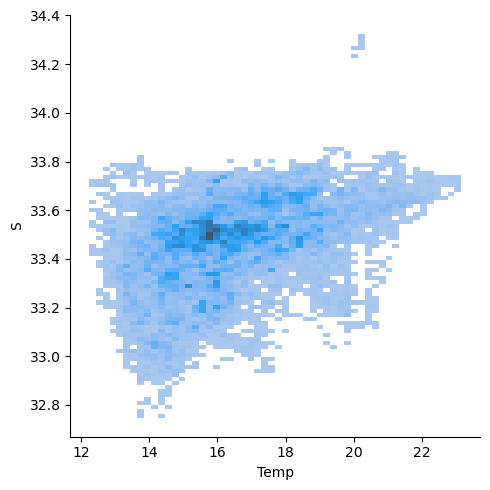

In [57]:
sns.displot(data=df_s, x='Temp', y='S')

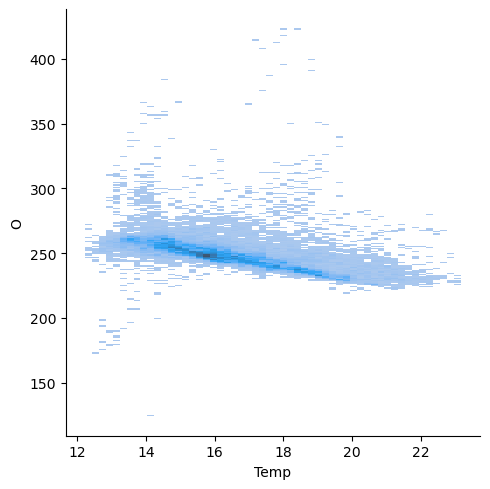

In [58]:
sns.displot(data=df_s, x='Temp', y='O')

# 3D view (of sorts)

## Paint on Oxy

In [87]:
Tbins = np.linspace(12.5,23, 20)
Sbins = np.linspace(32.8, 33.9, 20)

In [88]:
med_oxy, xedges, yedges, _ =\
            stats.binned_statistic_2d(
                df_s.Temp, df_s.S, df_s.O,
                'median', # 'std', 
                bins=[Tbins, Sbins])

### Plot

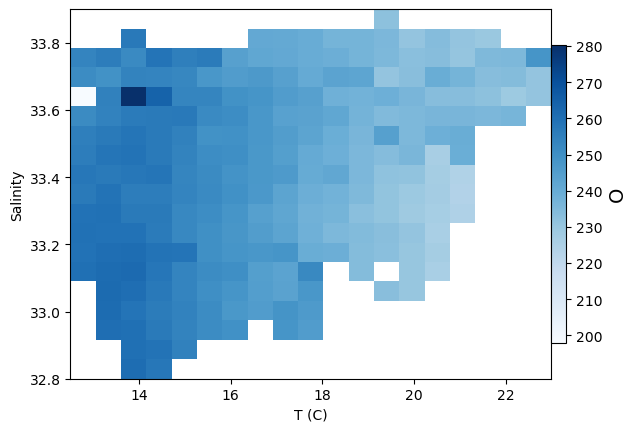

In [89]:
plt.clf()
ax = plt.gca()
#
cmap = 'Blues'
img = ax.pcolormesh(xedges, yedges, 
                             med_oxy.T, cmap=cmap) 
# colorbar
cb = plt.colorbar(img, pad=0., fraction=0.030)
cb.set_label('O', fontsize=14.)

#
ax.set_xlabel('T (C)')
ax.set_ylabel('Salinity')

plt.show()

## Scatter off of T,O relation

In [79]:
Obins = np.linspace(225., 325., 50)

In [80]:
med_S, xedges2, yedges2, _ =\
            stats.binned_statistic_2d(
                df_s.Temp, df_s.O, df_s.S,
                'median', # 'std', 
                bins=[Tbins, Obins])

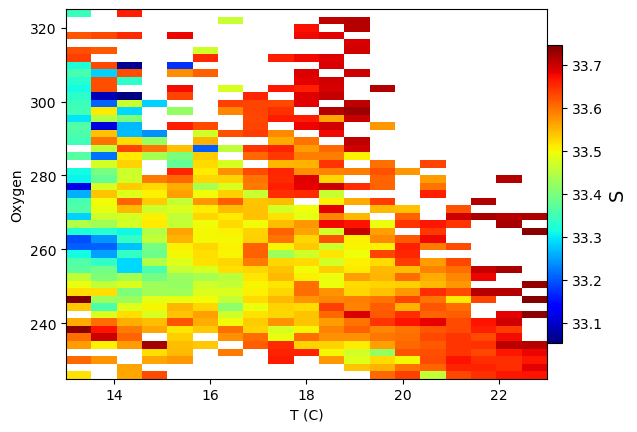

In [81]:
plt.clf()
ax = plt.gca()
#
cmap = 'jet'
img = ax.pcolormesh(xedges2, yedges2, 
                             med_S.T, cmap=cmap) 
# colorbar
cb = plt.colorbar(img, pad=0., fraction=0.030)
cb.set_label('S', fontsize=14.)

#
ax.set_xlabel('T (C)')
ax.set_ylabel('Oxygen')

plt.show()

----

<xarray.DataArray 'lon' (profile: 54842)>
array([-0.4423625, -0.00531  , -0.009945 , ...,  0.00185  ,  0.0013775,
        0.00184  ])
Coordinates:
  * profile  (profile) int32 0 1 2 3 4 5 ... 54836 54837 54838 54839 54840 54841
    lat      (profile) float64 33.44 33.44 33.44 33.44 ... 32.89 32.89 32.88
    lon      (profile) float64 -117.7 -117.7 -117.7 ... -117.3 -117.3 -117.3
    lat_uv   (profile) float64 33.44 33.44 33.44 33.44 ... 32.89 32.89 32.88
    lon_uv   (profile) float64 -117.7 -117.7 -117.7 ... -117.3 -117.3 -117.3
    time     (profile) datetime64[ns] 2006-10-19T17:51:00 ... 2023-03-20T15:4...
    time_uv  (profile) datetime64[ns] 2006-10-19T17:41:00 ... 2023-03-20T15:3...

In [11]:
dist, offset = cugn_utils.calc_dist_offset('90', ds.lon, ds.lat)

In [12]:
ddist = dist - np.roll(dist,1)

<Axes: ylabel='Count'>

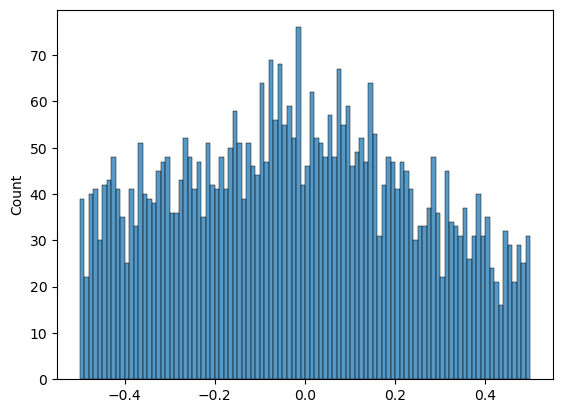

In [16]:
sns.histplot(ddist[np.abs(ddist) < 0.5], bins=100)